## Тема “Обучение без учителя”

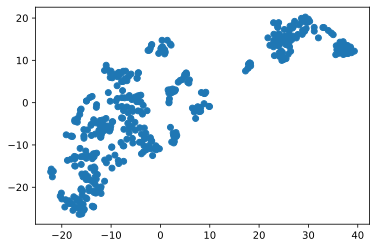

In [104]:
"""Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%config InlineBackend.figure_format = 'svg'


boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])


In [105]:
""" Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.
"""

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

# Чтобы определить, какой кластер имеет какой цвет, найдём их центры на диаграмме:

{c: {(X_train_tsne[labels_train == c, 0].mean(), X_train_tsne[labels_train == c, 1].mean())}
  for c in np.unique(labels_train)}

{0: {(-15.178743, -18.578354)},
 1: {(23.240421, 13.23484)},
 2: {(-5.9432335, -2.4097507)}}

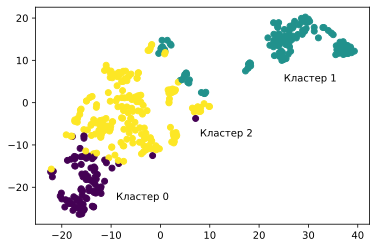

In [106]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-9, -23, "Кластер 0")
plt.text(25, 5, "Кластер 1")
plt.text(8, -8, "Кластер 2")
plt.show()

In [115]:
# Средние значения price и CRIM в разных кластерах тренировочного набора
for c in range(3):
    print(f"Cluster {c}: "
          f"mean price = {y_train[labels_train==c]['price'].mean()}, "
          f"mean CRIM = {X_train[labels_train==c]['CRIM'].mean()}"
    )

Cluster 0: mean price = 27.78837209302326, mean CRIM = 0.07356558139534884
Cluster 1: mean price = 16.165354330708663, mean CRIM = 10.797028425196851
Cluster 2: mean price = 24.958115183246072, mean CRIM = 0.4216602094240837


Можно сделать вывод, что квартиры разбились на кластеры благодаря (точнее, в том числе благодаря) показателю криминальности, где она отличается на порядок и более. Цена отличается не так сильно и, ожидаемо, обратным образом коррелирует с криминальностью.

In [112]:
""" *Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.
"""

labels_test = kmeans.predict(X_test_scaled)

# Средние значения price и CRIM в разных кластерах тестового набора
for c in range(3):
    print(f"Cluster {c}: "
          f"mean price = {y_test[labels_test==c]['price'].mean()}, "
          f"mean CRIM = {X_test[labels_test==c]['CRIM'].mean()}"
    )

Cluster 0: mean price = 31.35, mean CRIM = 0.06206
Cluster 1: mean price = 16.43714285714286, mean CRIM = 10.165531142857143
Cluster 2: mean price = 21.860784313725492, mean CRIM = 0.2660788235294118


Тестовый набор в общем и целом по двум этим параметрам похож на тренировочный, но вот средний показатель CRIM в одном из кластеров оказался почти в 2 раза отличающимся.